In [17]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/email-spam-classification-dataset/combined_data.csv


In [18]:
import pandas as pd 
import numpy as np

In [19]:
df = pd.read_csv("/kaggle/input/email-spam-classification-dataset/combined_data.csv",low_memory=False)

In [20]:
df.head()

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


In [21]:
df['label'].value_counts() # '1' indicate spam '0' indicate non spam

label
1    43910
0    39538
Name: count, dtype: int64

In [22]:
import re
def clean_text(text):
    text = text.lower()
    text = re.sub(r"<.*?>", " ", text)   # Remove HTML
    text = re.sub(r"http\S+", "", text)  # Remove URLs
    text = re.sub(r"\s+", " ", text)     # Remove extra whitespace
    return text.strip()

df['text'] = df['text'].apply(clean_text)

In [23]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import numpy as np

In [24]:
# Parameters
max_vocab = 10000      # More emails = larger vocab
max_len = 200          

# Tokenize
tokenizer = Tokenizer(num_words=max_vocab, oov_token="<OOV>")
tokenizer.fit_on_texts(df['text'])
sequences = tokenizer.texts_to_sequences(df['text'])
padded = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')

# Labels
labels = np.array(df['label'])

In [25]:
X_train,X_test,y_train,y_test = train_test_split(padded,labels,test_size=0.2,stratify=labels,random_state=42)

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout

In [27]:
model = Sequential([
    Embedding(input_dim=max_vocab, output_dim=100, input_length=200),
    Conv1D(128, kernel_size=3, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [28]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_1          │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [29]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=512,
    validation_split=0.2,
    verbose=1
)

Epoch 1/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.7943 - loss: 0.4403 - val_accuracy: 0.9788 - val_loss: 0.0627
Epoch 2/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9858 - loss: 0.0465 - val_accuracy: 0.9858 - val_loss: 0.0442
Epoch 3/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9952 - loss: 0.0200 - val_accuracy: 0.9867 - val_loss: 0.0426
Epoch 4/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9979 - loss: 0.0097 - val_accuracy: 0.9858 - val_loss: 0.0447
Epoch 5/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9990 - loss: 0.0053 - val_accuracy: 0.9867 - val_loss: 0.0486
Epoch 6/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9994 - loss: 0.0036 - val_accuracy: 0.9863 - val_loss: 0.0519
Epoch 7/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9997 - loss: 0.0024 - val_accuracy: 0.9864 - val_loss: 0.0524
Epoch 8/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9996 - loss: 0.0027 - val_accu

## Evaluations

In [30]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc:.4f}")

522/522 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9873 - loss: 0.0564
Test Accuracy: 0.9879


<function matplotlib.pyplot.show(close=None, block=None)>

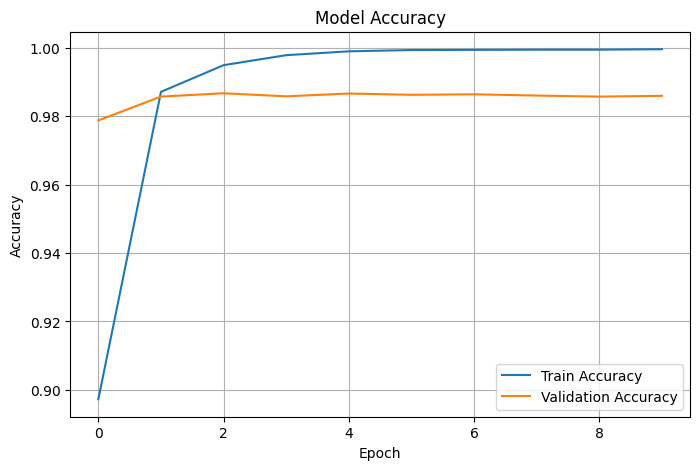

In [36]:
import matplotlib.pyplot as plt
# Accuracy
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show

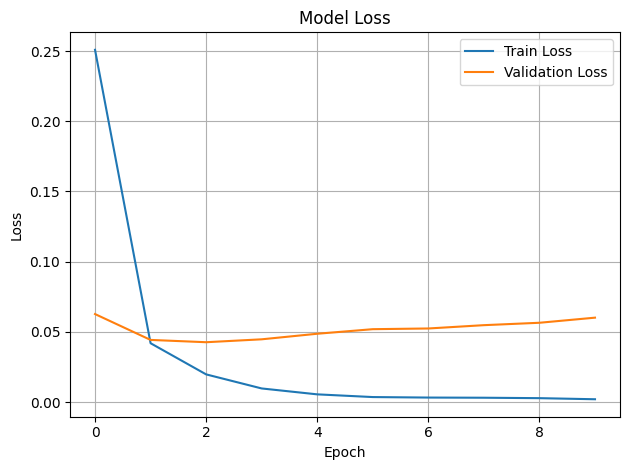

In [38]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [46]:
from sklearn.metrics import precision_score, recall_score, f1_score,confusion_matrix,ConfusionMatrixDisplay

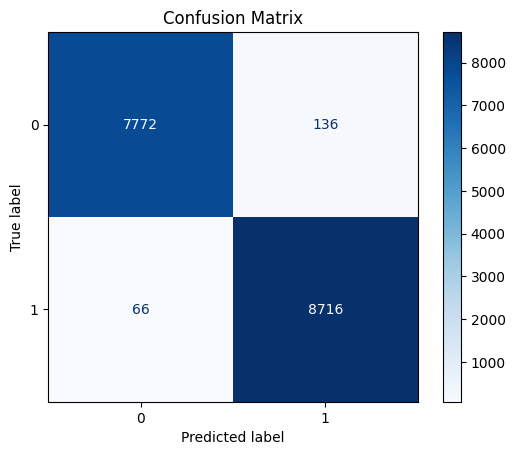

In [47]:
cm = confusion_matrix(y_test, y_pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [40]:
y_pred = model.predict(X_test)
y_pred_labels = (y_pred > 0.5).astype(int)

522/522 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [42]:
# Calculate metrics
precision = precision_score(y_test, y_pred_labels)
recall = recall_score(y_test, y_pred_labels)
f1 = f1_score(y_test, y_pred_labels)

print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}")

Precision: 0.98, Recall: 0.99, F1 Score: 0.99


## Ploting ROC AUC Curve

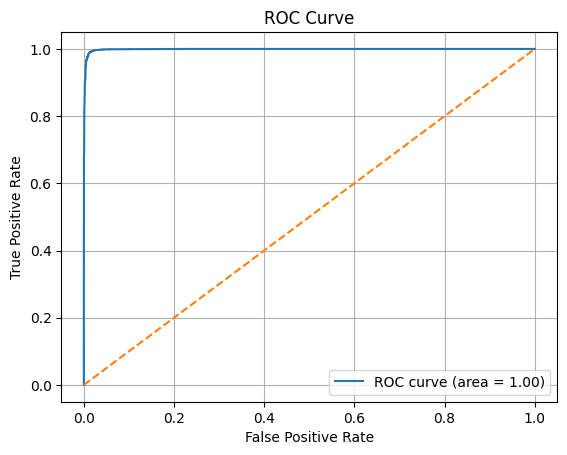

In [45]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], '--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()